# Problem Statement

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual value and flip them at a higher price. For the same purpose, the company has collected a data set from house sales in Australia. The data is provided in the csv file below.

 

The company is looking at prospective properties to buy to enter the market.

You are required to build a regression model using regularization, so as to predict the actual value of the prospective properties and decide whether to invest in them or not.

 

The company wants to know:

Which variables are significant in predicting the price of a house

How well those variables describe the price of a house

 

Also, determine the optimal value of lambda for ridge and lasso regression.

## Business Goal 

 Model the price of houses with the available independent variables. It will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high rewards. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

## 1. Data Understanding and Exploration

Let's first have a look at the dataset and understand the size, attribute names etc.

In [1]:
# Ignore  the warnings
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

# data visualisation and manipulation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
from matplotlib.legend_handler import HandlerBase
import seaborn as sns

#configure
# sets matplotlib to inline and displays graphs below the corressponding cell.
%matplotlib inline  
style.use('fivethirtyeight')
sns.set(style='whitegrid',color_codes=True)

#import the necessary modelling algos.

#regression
from sklearn.linear_model import LinearRegression,Ridge,Lasso

#model selection
from sklearn.model_selection import train_test_split,cross_validate
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

#evaluation metrics
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error # for regression

from scipy import stats
from scipy.stats import norm, skew   # specifically for staistics

In [2]:
# reading the dataset
houses = pd.read_csv("train.csv")
houses.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
# Inspect the various aspects of the house dataframe
print(houses.shape)

# No columns and rows have null values
print(houses.info())

# Description about the house dataframe
print(houses.describe())

(1460, 81)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st     

## 2. Visualising the Data
Let's now spend some time doing what is arguably the most important step - understanding the data.
If there is some obvious multicollinearity going on, this is the first place to catch it
Here's where you'll also identify if some predictors directly have a strong association with the outcome variable
We'll visualise our data using matplotlib and seaborn.

### Analyzing the target i.e. 'SalePrice'

Text(0.5, 1.0, 'Sale Price')

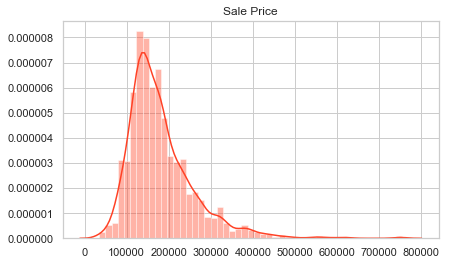

In [4]:
# Analyzing the target variable ie 'Saleprice'
sns.distplot(a=houses['SalePrice'],color='#ff4125',axlabel=False).set_title('Sale Price')

#### Note that the distribution of the target is quite right skewed. Hence we can take the 'log' transfrom of the target variable. 

ALSO LINEAR REGRESSION IS BASED ON THE ASSUMPTION OF THE 'HOMOSCADESITY' AND HENCE TAKING LOG WILL BE A GOOD IDEA TO ENSURE 'HOMOSCADESITY' (that the varince of errors is constant).

In [5]:
from scipy import stats
from scipy.stats import norm, skew   # specifically for stats

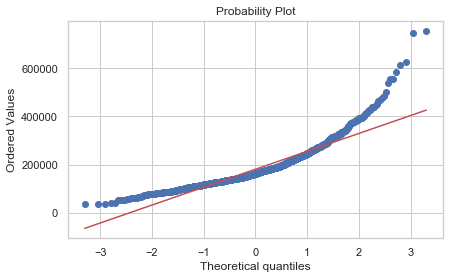

In [6]:
#Get also the qq-plot (the quantile-quantile plot)
fig = plt.figure()
res = stats.probplot(houses['SalePrice'], plot=plt)
plt.show()

In [7]:
# TAKING 'Log Transform' OF THE TARGET
houses['SalePrice']=np.log1p(houses['SalePrice']) 

Text(0.5, 1.0, 'log(1+SalePrice)')

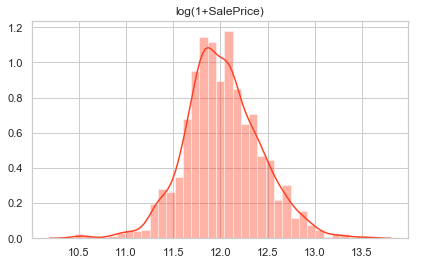

In [8]:
# now gain see the distribution.
sns.distplot(a=houses['SalePrice'],color='#ff4125',axlabel=False).set_title('log(1+SalePrice)') 

In [9]:
# Most Related Features to the Target
cor_mat= houses[:].corr()
cor_with_tar=cor_mat.sort_values(['SalePrice'],ascending=False)

In [10]:
print("The most relevant features (numeric) for the target are :")
cor_with_tar.SalePrice

The most relevant features (numeric) for the target are :


SalePrice        1.000000
OverallQual      0.817185
GrLivArea        0.700927
GarageCars       0.680625
GarageArea       0.650888
TotalBsmtSF      0.612134
1stFlrSF         0.596981
FullBath         0.594771
YearBuilt        0.586570
YearRemodAdd     0.565608
GarageYrBlt      0.541073
TotRmsAbvGrd     0.534422
Fireplaces       0.489450
MasVnrArea       0.430809
BsmtFinSF1       0.372023
LotFrontage      0.355879
WoodDeckSF       0.334135
OpenPorchSF      0.321053
2ndFlrSF         0.319300
HalfBath         0.313982
LotArea          0.257320
BsmtFullBath     0.236224
BsmtUnfSF        0.221985
BedroomAbvGr     0.209043
ScreenPorch      0.121208
PoolArea         0.069798
MoSold           0.057330
3SsnPorch        0.054900
BsmtFinSF2       0.004832
BsmtHalfBath    -0.005149
Id              -0.017942
MiscVal         -0.020021
OverallCond     -0.036868
YrSold          -0.037263
LowQualFinSF    -0.037963
MSSubClass      -0.073959
KitchenAbvGr    -0.147548
EnclosedPorch   -0.149050
Name: SalePr

#### INFERENCES--

1. Note that some of the features have really high corelation with the target. These features are really significant.

2. Of these the features with corelation value >0.5 are really significant. Some features like GrLivArea etc.. are evn more important.

3. We will consider these features (i.e. GrLivArea,OverallQual) etc.. in more detail in subsequent sections.

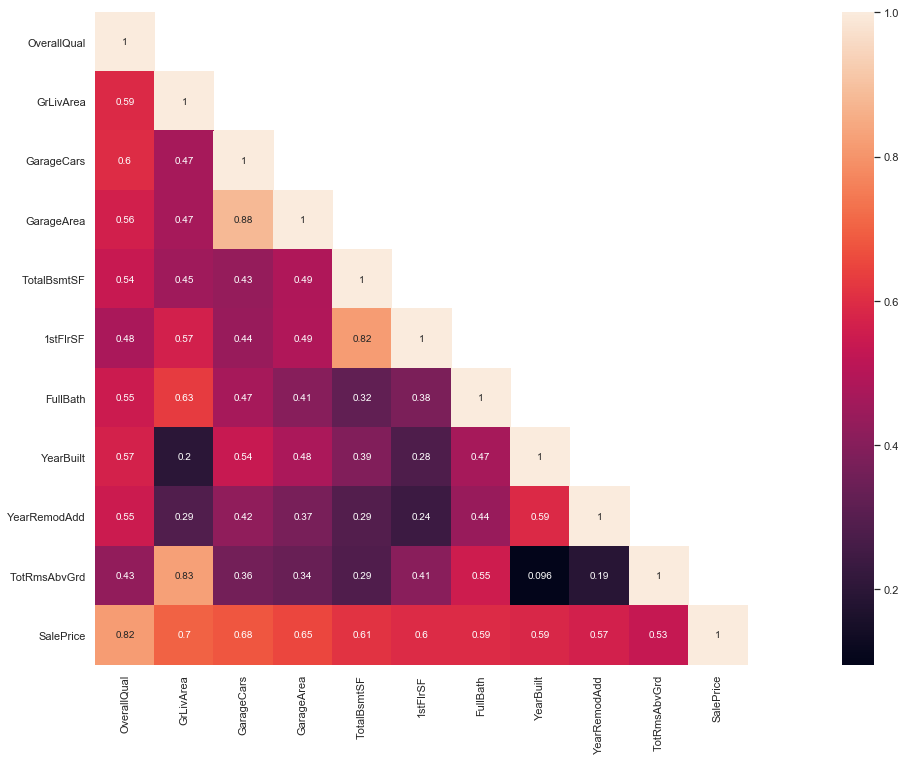

In [11]:
# Using a corelation map to visualize features with high corelation.
# corelation matrix.
cor_mat= houses[['OverallQual','GrLivArea','GarageCars','GarageArea','TotalBsmtSF','1stFlrSF','FullBath',
             'YearBuilt','YearRemodAdd','TotRmsAbvGrd','SalePrice']].corr()
mask = np.array(cor_mat)
mask[np.tril_indices_from(mask)] = False
fig=plt.gcf()
fig.set_size_inches(30,12)
sns.heatmap(data=cor_mat,mask=mask,square=True,annot=True,cbar=True)

### Univariate Analysis
In this section I have performed the univariate analysis; particularly on those features which have very high corelation with the the Target variable as these are quite important.
For the numeric features I have used a 'distplot' and 'boxplot' to analyze the distribution.
Similarly for categorical features the most reasonable way to visualize the distribution is to use a 'countplot' which shows the counts for each category or class.

#### NUMERIC FEATURES

In [12]:
def plot_num(feature):
    fig,axes=plt.subplots(1,2)
    sns.boxplot(data=houses,x=feature,ax=axes[0])
    sns.distplot(a=houses[feature],ax=axes[1],color='#ff4125')
    fig.set_size_inches(15,5)

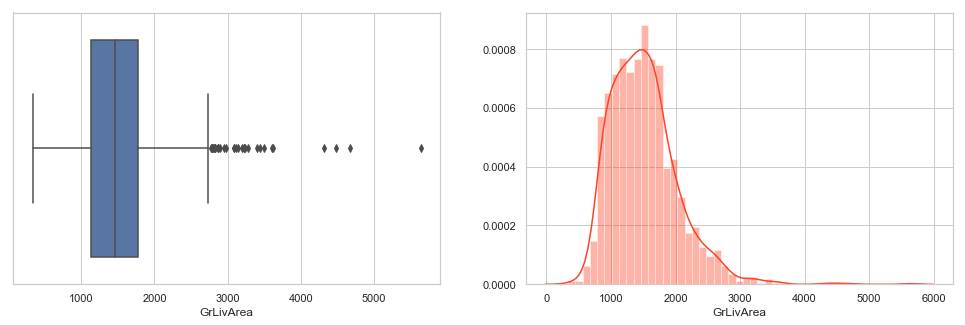

In [13]:
plot_num('GrLivArea')

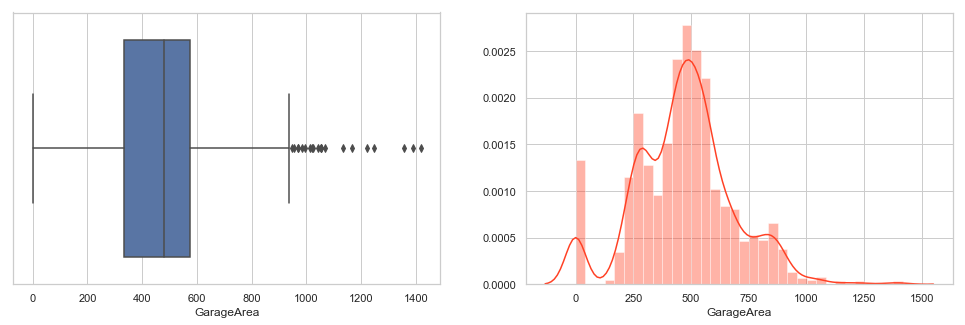

In [14]:
plot_num('GarageArea')

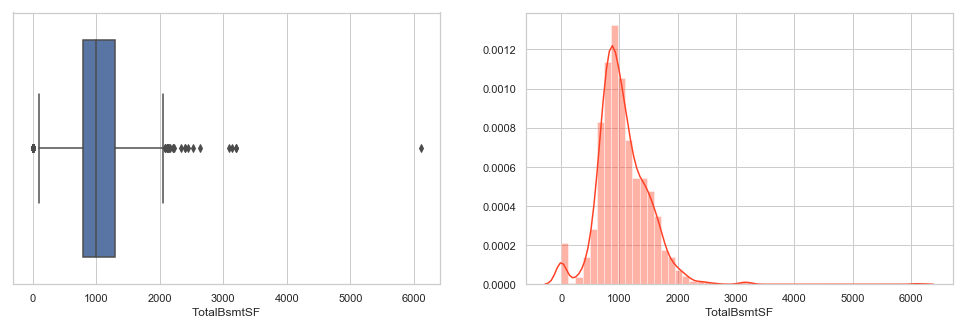

In [15]:
plot_num('TotalBsmtSF') 

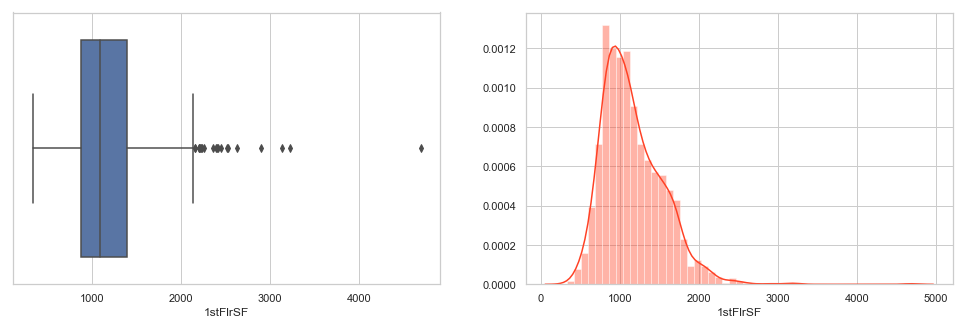

In [16]:
plot_num('1stFlrSF')

#### Note the features are a bit right skewed. We can therefore take 'log transform' of the features

#### CATEGORICAL FEATURES

In [17]:
def plot_cat(feature):
    sns.countplot(data=houses,x=feature)
    ax=sns.countplot(data=houses,x=feature)

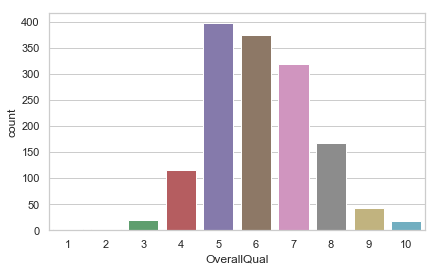

In [18]:
plot_cat('OverallQual')

Most of them are in 'avergae','above avergae' or 'good' categories.

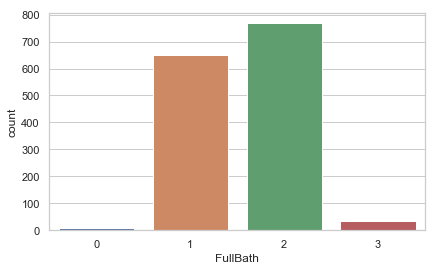

In [19]:
plot_cat('FullBath')

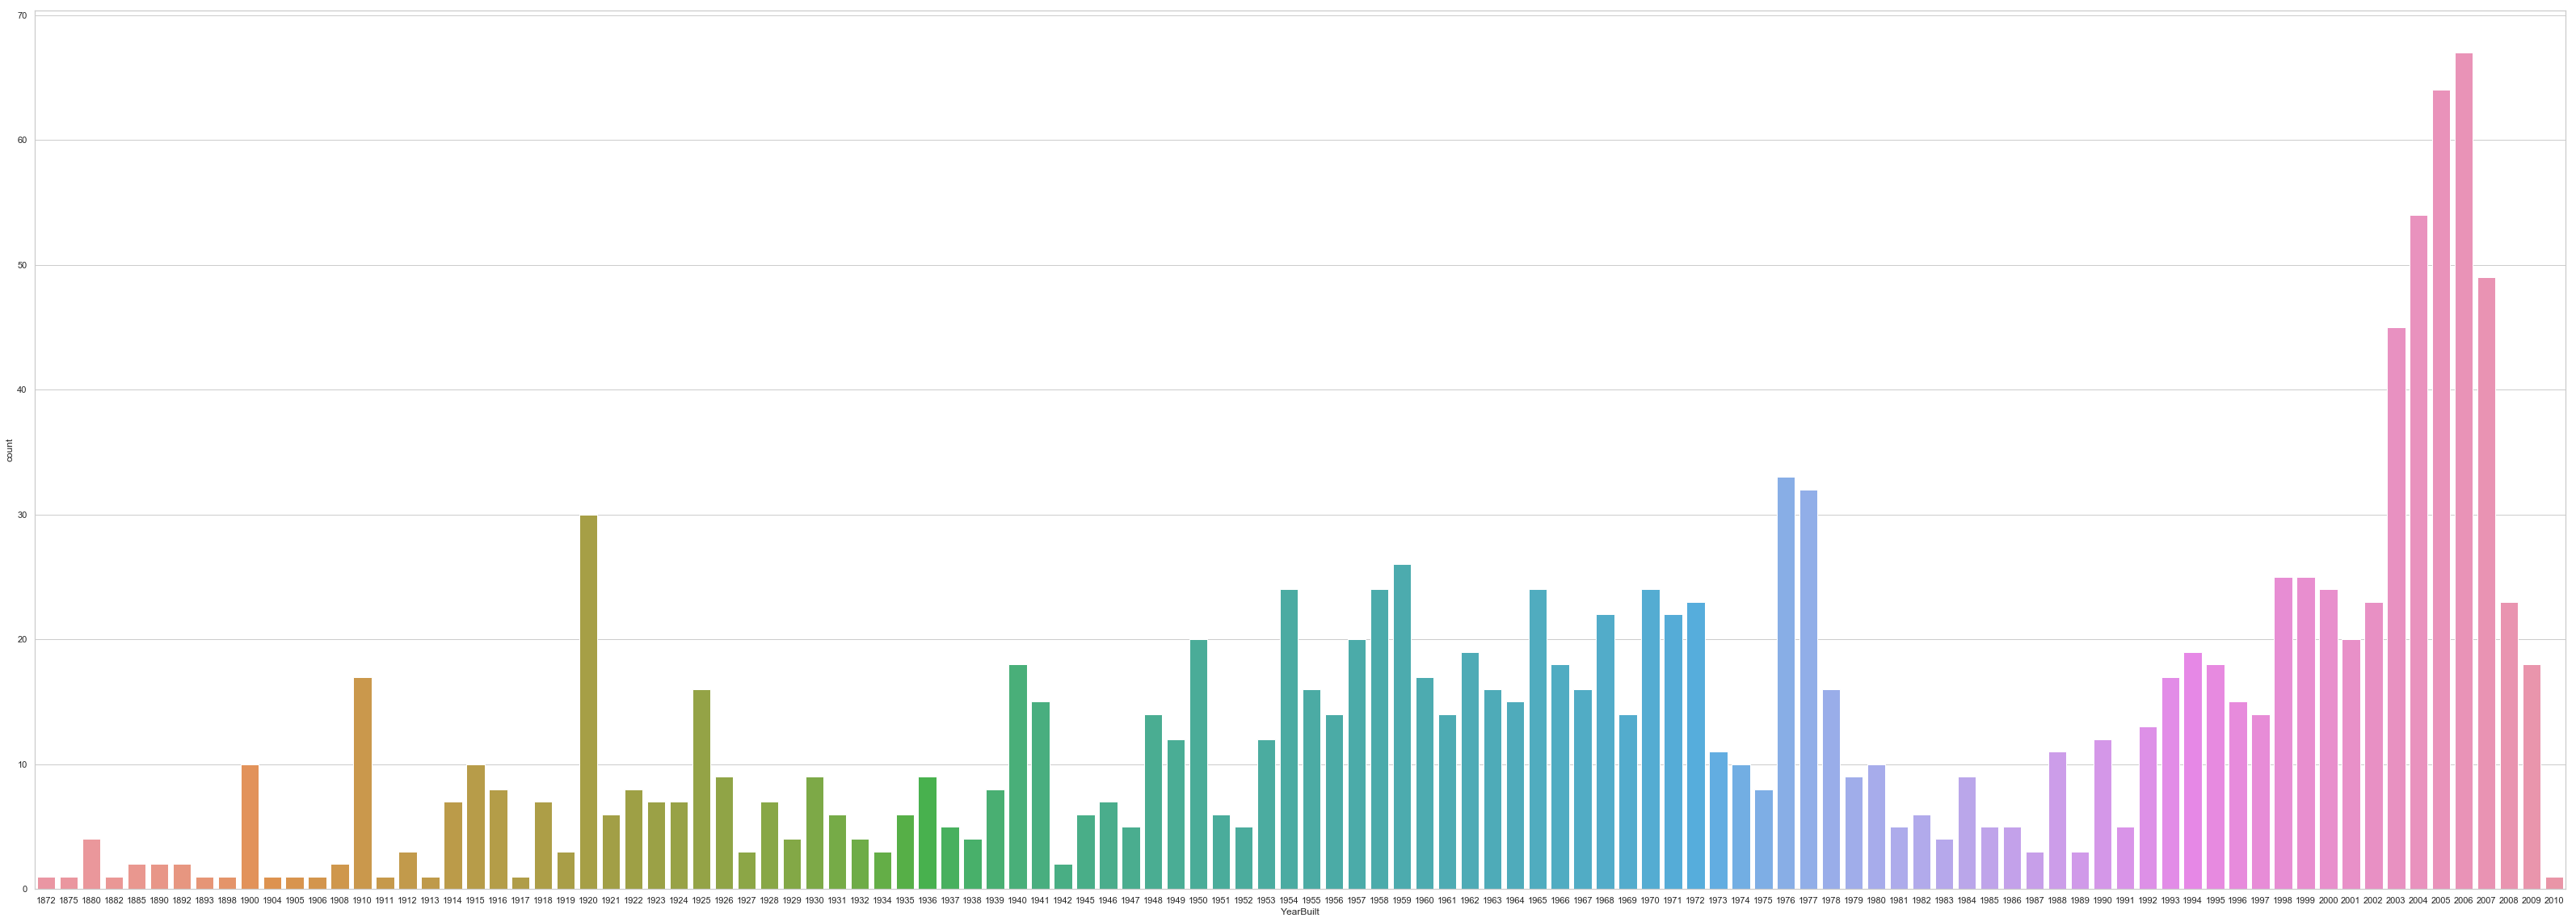

In [20]:
plt.figure(figsize=(50, 20))
plot_cat('YearBuilt')

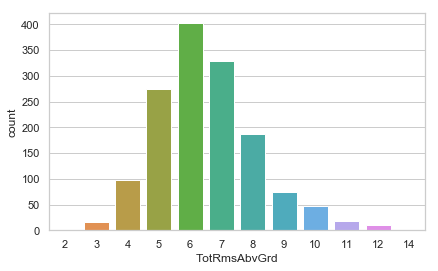

In [21]:
plot_cat('TotRmsAbvGrd')

Most of the houses have 5-7 rooms above the grd floor.

#### Lastly we plot the countplot for some important features that are numerical here but are actually categorical and seems if they have been label encoded.

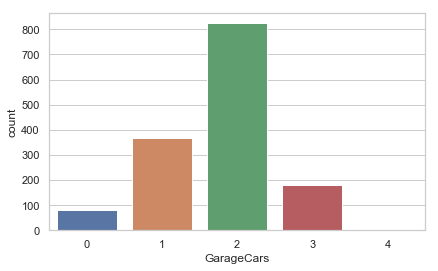

In [22]:
plot_cat('GarageCars')

C:\Users\darsh\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\categorical.py:3692: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


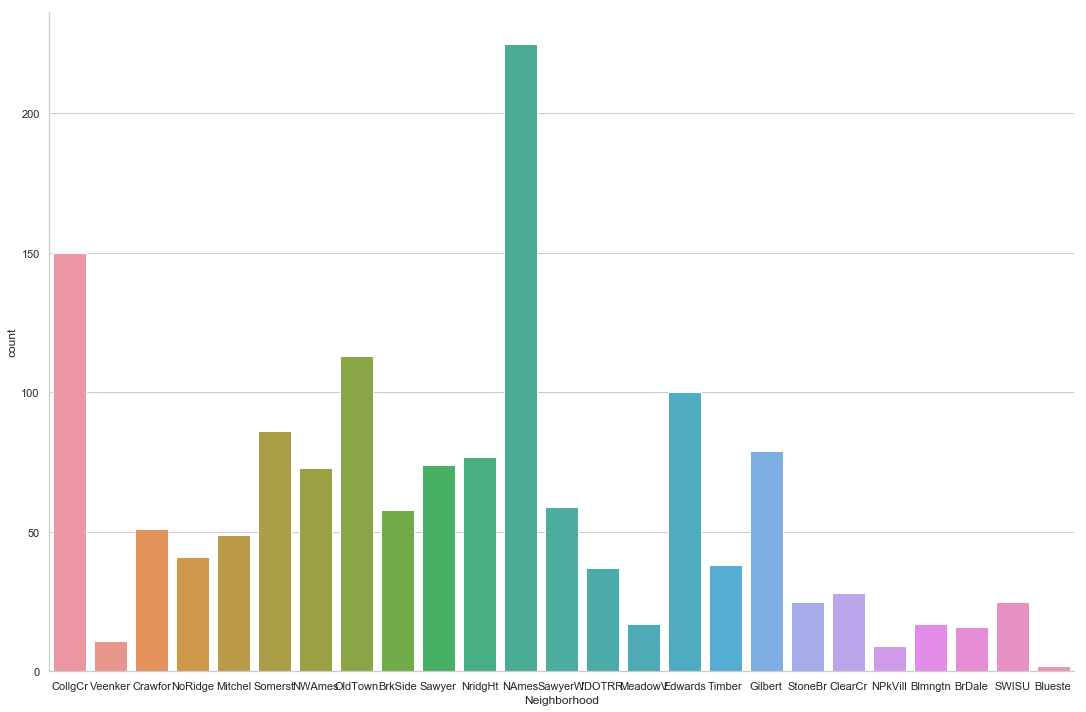

In [23]:
sns.catplot(data=houses,x='Neighborhood',kind='count',size=10,aspect=1.5)

### Bivariate Analysis

In this section the Bivariate Analysis have been done. I have plotted various numeric as well as categorical features against the target ie 'SalePrice'.

#### NUMERIC FEATURES

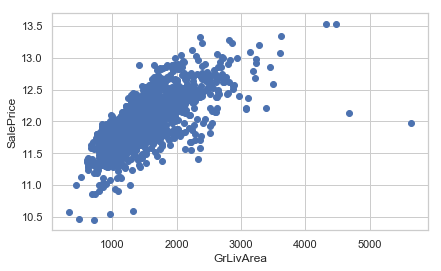

In [24]:
fig, ax = plt.subplots()
ax.scatter(x = houses['GrLivArea'], y = houses['SalePrice'])
plt.ylabel('SalePrice')
plt.xlabel('GrLivArea')
plt.show()

#### Note that there are two outliers on the lower right hand side and can remove them.

In [25]:
# Removing some outliers on lower right side
houses = houses.drop(houses[(houses['GrLivArea']>4000) & (houses['SalePrice']<13)].index)

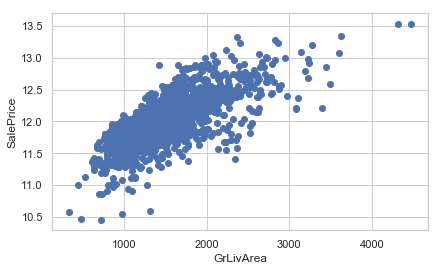

In [26]:
# again checking
fig, ax = plt.subplots()
ax.scatter(x = houses['GrLivArea'], y = houses['SalePrice'])
plt.ylabel('SalePrice')
plt.xlabel('GrLivArea')
plt.show()

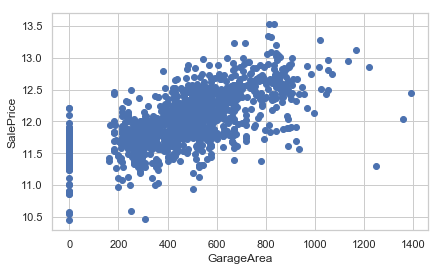

In [27]:
# garage area
fig, ax = plt.subplots()
ax.scatter(x =(houses['GarageArea']), y = houses['SalePrice'])
plt.ylabel('SalePrice')
plt.xlabel('GarageArea')
plt.show()
# can try to remove the points with gargae rea > than 1200.

In [28]:
# Removing some outliers on lower right side
houses = houses.drop(houses[(houses['GarageArea']>1200) & (houses['SalePrice']<12.5)].index)

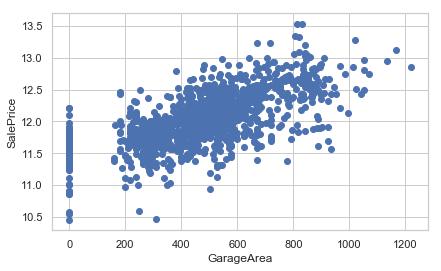

In [29]:
# again checking
fig, ax = plt.subplots()
ax.scatter(x =(houses['GarageArea']), y = houses['SalePrice'])
plt.ylabel('SalePrice')
plt.xlabel('GarageArea')
plt.show()

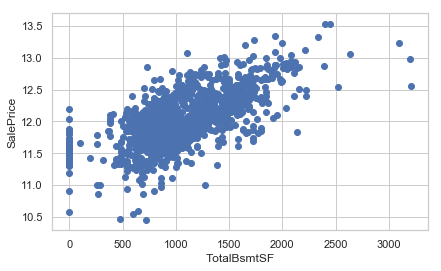

In [30]:
# basment area
fig, ax = plt.subplots()
ax.scatter(x =(houses['TotalBsmtSF']), y = houses['SalePrice'])
plt.ylabel('SalePrice')
plt.xlabel('TotalBsmtSF')
plt.show()   # check >3000 can leave here.

In [31]:
# Removing some outliers 
houses = houses.drop(houses[(houses['TotalBsmtSF']>3000)].index)

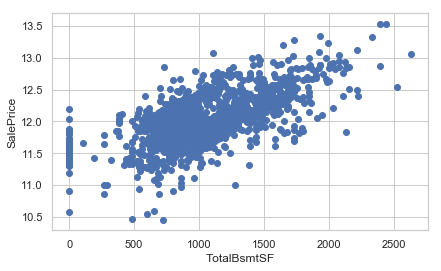

In [32]:
# Again check
fig, ax = plt.subplots()
ax.scatter(x =(houses['TotalBsmtSF']), y = houses['SalePrice'])
plt.ylabel('SalePrice')
plt.xlabel('TotalBsmtSF')
plt.show()

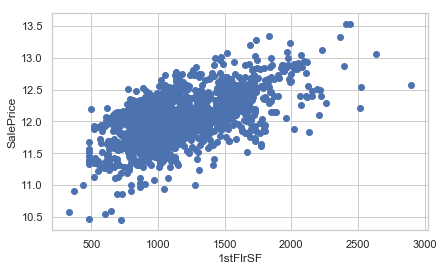

In [33]:
# 1st floor area
fig, ax = plt.subplots()
ax.scatter(x =(houses['1stFlrSF']), y = houses['SalePrice'])
plt.ylabel('SalePrice')
plt.xlabel('1stFlrSF')
plt.show()

In [34]:
# Removing some outliers 
houses = houses.drop(houses[(houses['1stFlrSF']>2700)].index)

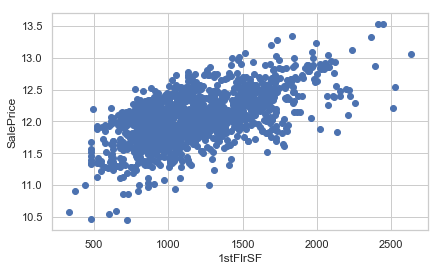

In [35]:
# 1st floor area
fig, ax = plt.subplots()
ax.scatter(x =(houses['1stFlrSF']), y = houses['SalePrice'])
plt.ylabel('SalePrice')
plt.xlabel('1stFlrSF')
plt.show()

#### CATEGORICAL FEATURES

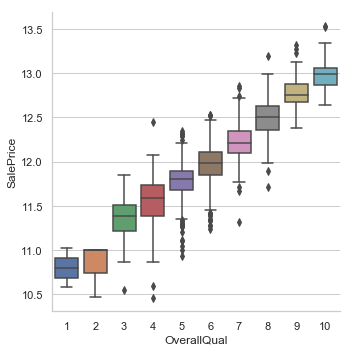

In [36]:
# Overall qual
sns.catplot(data=houses,x='OverallQual',y='SalePrice',kind='box')

Clearly as the overall quality increases the sale price also increases which is pretty obvious.

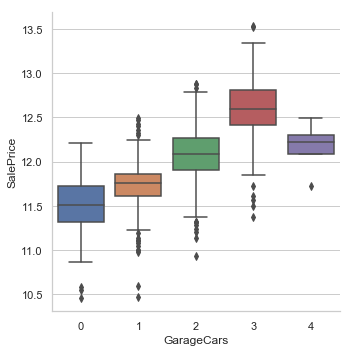

In [37]:
# Garage cars
sns.catplot(data=houses,x='GarageCars',y='SalePrice',kind='box')

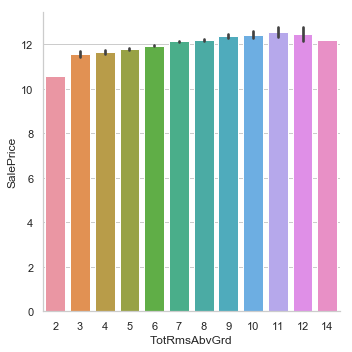

In [38]:
# No of rooms
sns.catplot(data=houses,x='TotRmsAbvGrd',y='SalePrice',kind='bar') 

Increasing rooms imply increasing SalePrice as expected.

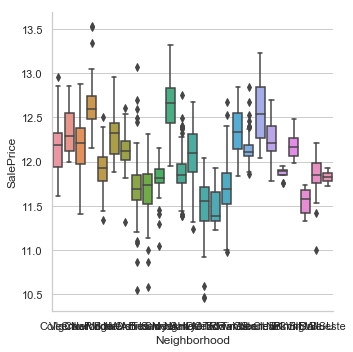

In [39]:
# Neighborhood
sns.catplot(data=houses,x='Neighborhood',y='SalePrice',kind='box')

- Price varies with neighborhood. 
- More posh areas of the city will have more price.

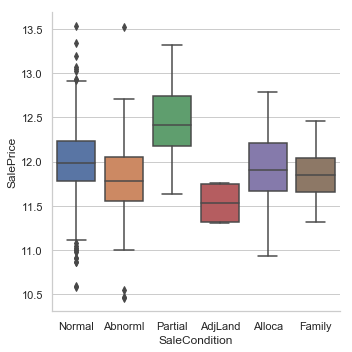

In [40]:
# Sale conditioin
sns.catplot(data=houses,x='SaleCondition',y='SalePrice',kind='box')

In [41]:
houses.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,12.247699
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,12.109016
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,12.317171
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,11.849405
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,12.429220


In [42]:
houses.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
                  ...   
BedroomAbvGr       int64
KitchenAbvGr       int64
KitchenQual       object
TotRmsAbvGrd       int64
Functional        object
Fireplaces         int64
FireplaceQu       object
GarageType        object
GarageYrBlt      float64


## 3. Exploratory Data Analysis (EDA)

In [43]:
# look for duplicates before data cleaning
print(houses.duplicated().sum())

# lets see the missing values
round(houses.isnull().sum()/len(houses.index)*100,2)

0


Id                0.00
MSSubClass        0.00
MSZoning          0.00
LotFrontage      17.64
LotArea           0.00
Street            0.00
Alley            93.73
LotShape          0.00
LandContour       0.00
Utilities         0.00
LotConfig         0.00
LandSlope         0.00
Neighborhood      0.00
Condition1        0.00
Condition2        0.00
BldgType          0.00
HouseStyle        0.00
OverallQual       0.00
OverallCond       0.00
YearBuilt         0.00
YearRemodAdd      0.00
RoofStyle         0.00
RoofMatl          0.00
Exterior1st       0.00
Exterior2nd       0.00
MasVnrType        0.55
MasVnrArea        0.55
ExterQual         0.00
ExterCond         0.00
Foundation        0.00
                 ...  
BedroomAbvGr      0.00
KitchenAbvGr      0.00
KitchenQual       0.00
TotRmsAbvGrd      0.00
Functional        0.00
Fireplaces        0.00
FireplaceQu      47.48
GarageType        5.58
GarageYrBlt       5.58
GarageFinish      5.58
GarageCars        0.00
GarageArea        0.00
GarageQual 

In [44]:
# Dropping the 'Id' columns as the DataFrames are already indexed.
houses.drop(['Id'],axis=1,inplace=True)

In [45]:
# the indices of the rows
print(houses.shape)

# Columns
print(houses.columns)

(1451, 80)
Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'Paved

###  Missing Values Treatment
Here I have analyzed if it that feaure is important or not and accordingly either have drooped it or imputed the values in it.
For imputation I have considered the meaning of the corressponding feature from the description. Like for a categorical feature if values are missing I have imputed "None" just to mark a separate category meaning absence of that thing. Similarly for a numeric feature I have imputed with 0 in case the missing value implies the 'absence' of that feature.
In all other cases I have imputed the categorical features with 'mode' i.e the most frequent class and with 'mean' for the numeric features.

In [46]:
#Fill Nones
noneCols = ["PoolQC", "MiscFeature", "Alley", "Fence", "FireplaceQu", "GarageCond", "GarageQual", "GarageFinish", "GarageType", "BsmtCond",
            "BsmtExposure", "BsmtQual", "BsmtFinType2", "BsmtFinType1", "MasVnrType"]
for col in noneCols:
    houses[col] = houses[col].fillna("None")

In [47]:
#Fill Zeros
zeroCols = ["LotFrontage", "MasVnrArea", "BsmtHalfBath", "BsmtFullBath", "BsmtFinSF1", "BsmtFinSF2", "BsmtUnfSF", "TotalBsmtSF", "KitchenQual",
            "GarageArea", "GarageCars"]
for col in zeroCols:
    houses[col] = houses[col].fillna(0)

In [48]:
#Fill Median/Mode
medCols = ["GarageYrBlt", "MSZoning", "Utilities", "Functional", "Exterior1st", "Exterior2nd", "SaleType", "Electrical"]
for col in medCols:
    if houses[col].dtype != object:
        houses[col] = houses[col].fillna(houses[col].median())
    else:
        houses[col] = houses[col].fillna(houses[col].mode()[0])

In [49]:
# lets see the missing values again
round(houses.isnull().sum()/len(houses.index)*100,2)

MSSubClass       0.0
MSZoning         0.0
LotFrontage      0.0
LotArea          0.0
Street           0.0
Alley            0.0
LotShape         0.0
LandContour      0.0
Utilities        0.0
LotConfig        0.0
LandSlope        0.0
Neighborhood     0.0
Condition1       0.0
Condition2       0.0
BldgType         0.0
HouseStyle       0.0
OverallQual      0.0
OverallCond      0.0
YearBuilt        0.0
YearRemodAdd     0.0
RoofStyle        0.0
RoofMatl         0.0
Exterior1st      0.0
Exterior2nd      0.0
MasVnrType       0.0
MasVnrArea       0.0
ExterQual        0.0
ExterCond        0.0
Foundation       0.0
BsmtQual         0.0
                ... 
BedroomAbvGr     0.0
KitchenAbvGr     0.0
KitchenQual      0.0
TotRmsAbvGrd     0.0
Functional       0.0
Fireplaces       0.0
FireplaceQu      0.0
GarageType       0.0
GarageYrBlt      0.0
GarageFinish     0.0
GarageCars       0.0
GarageArea       0.0
GarageQual       0.0
GarageCond       0.0
PavedDrive       0.0
WoodDeckSF       0.0
OpenPorchSF  

In [50]:
# Lastly checking if any null value still remains.
nan_houses = (houses.isnull().sum())
nan_houses= nan_houses.drop(nan_houses[nan_houses== 0].index).sort_values(ascending=False)
nan_houses
miss_df = pd.DataFrame({'Missing Ratio' :nan_houses})
miss_df

,Missing Ratio


In [51]:
houses.shape

(1451, 80)

In [52]:
# Get the number of retained rows using 'len()'
# Get the percentage of retained rows by dividing the current number of rows with initial number of rows
print(len(houses.index))
print(len(houses.index)/1460)

1451
0.9938356164383562


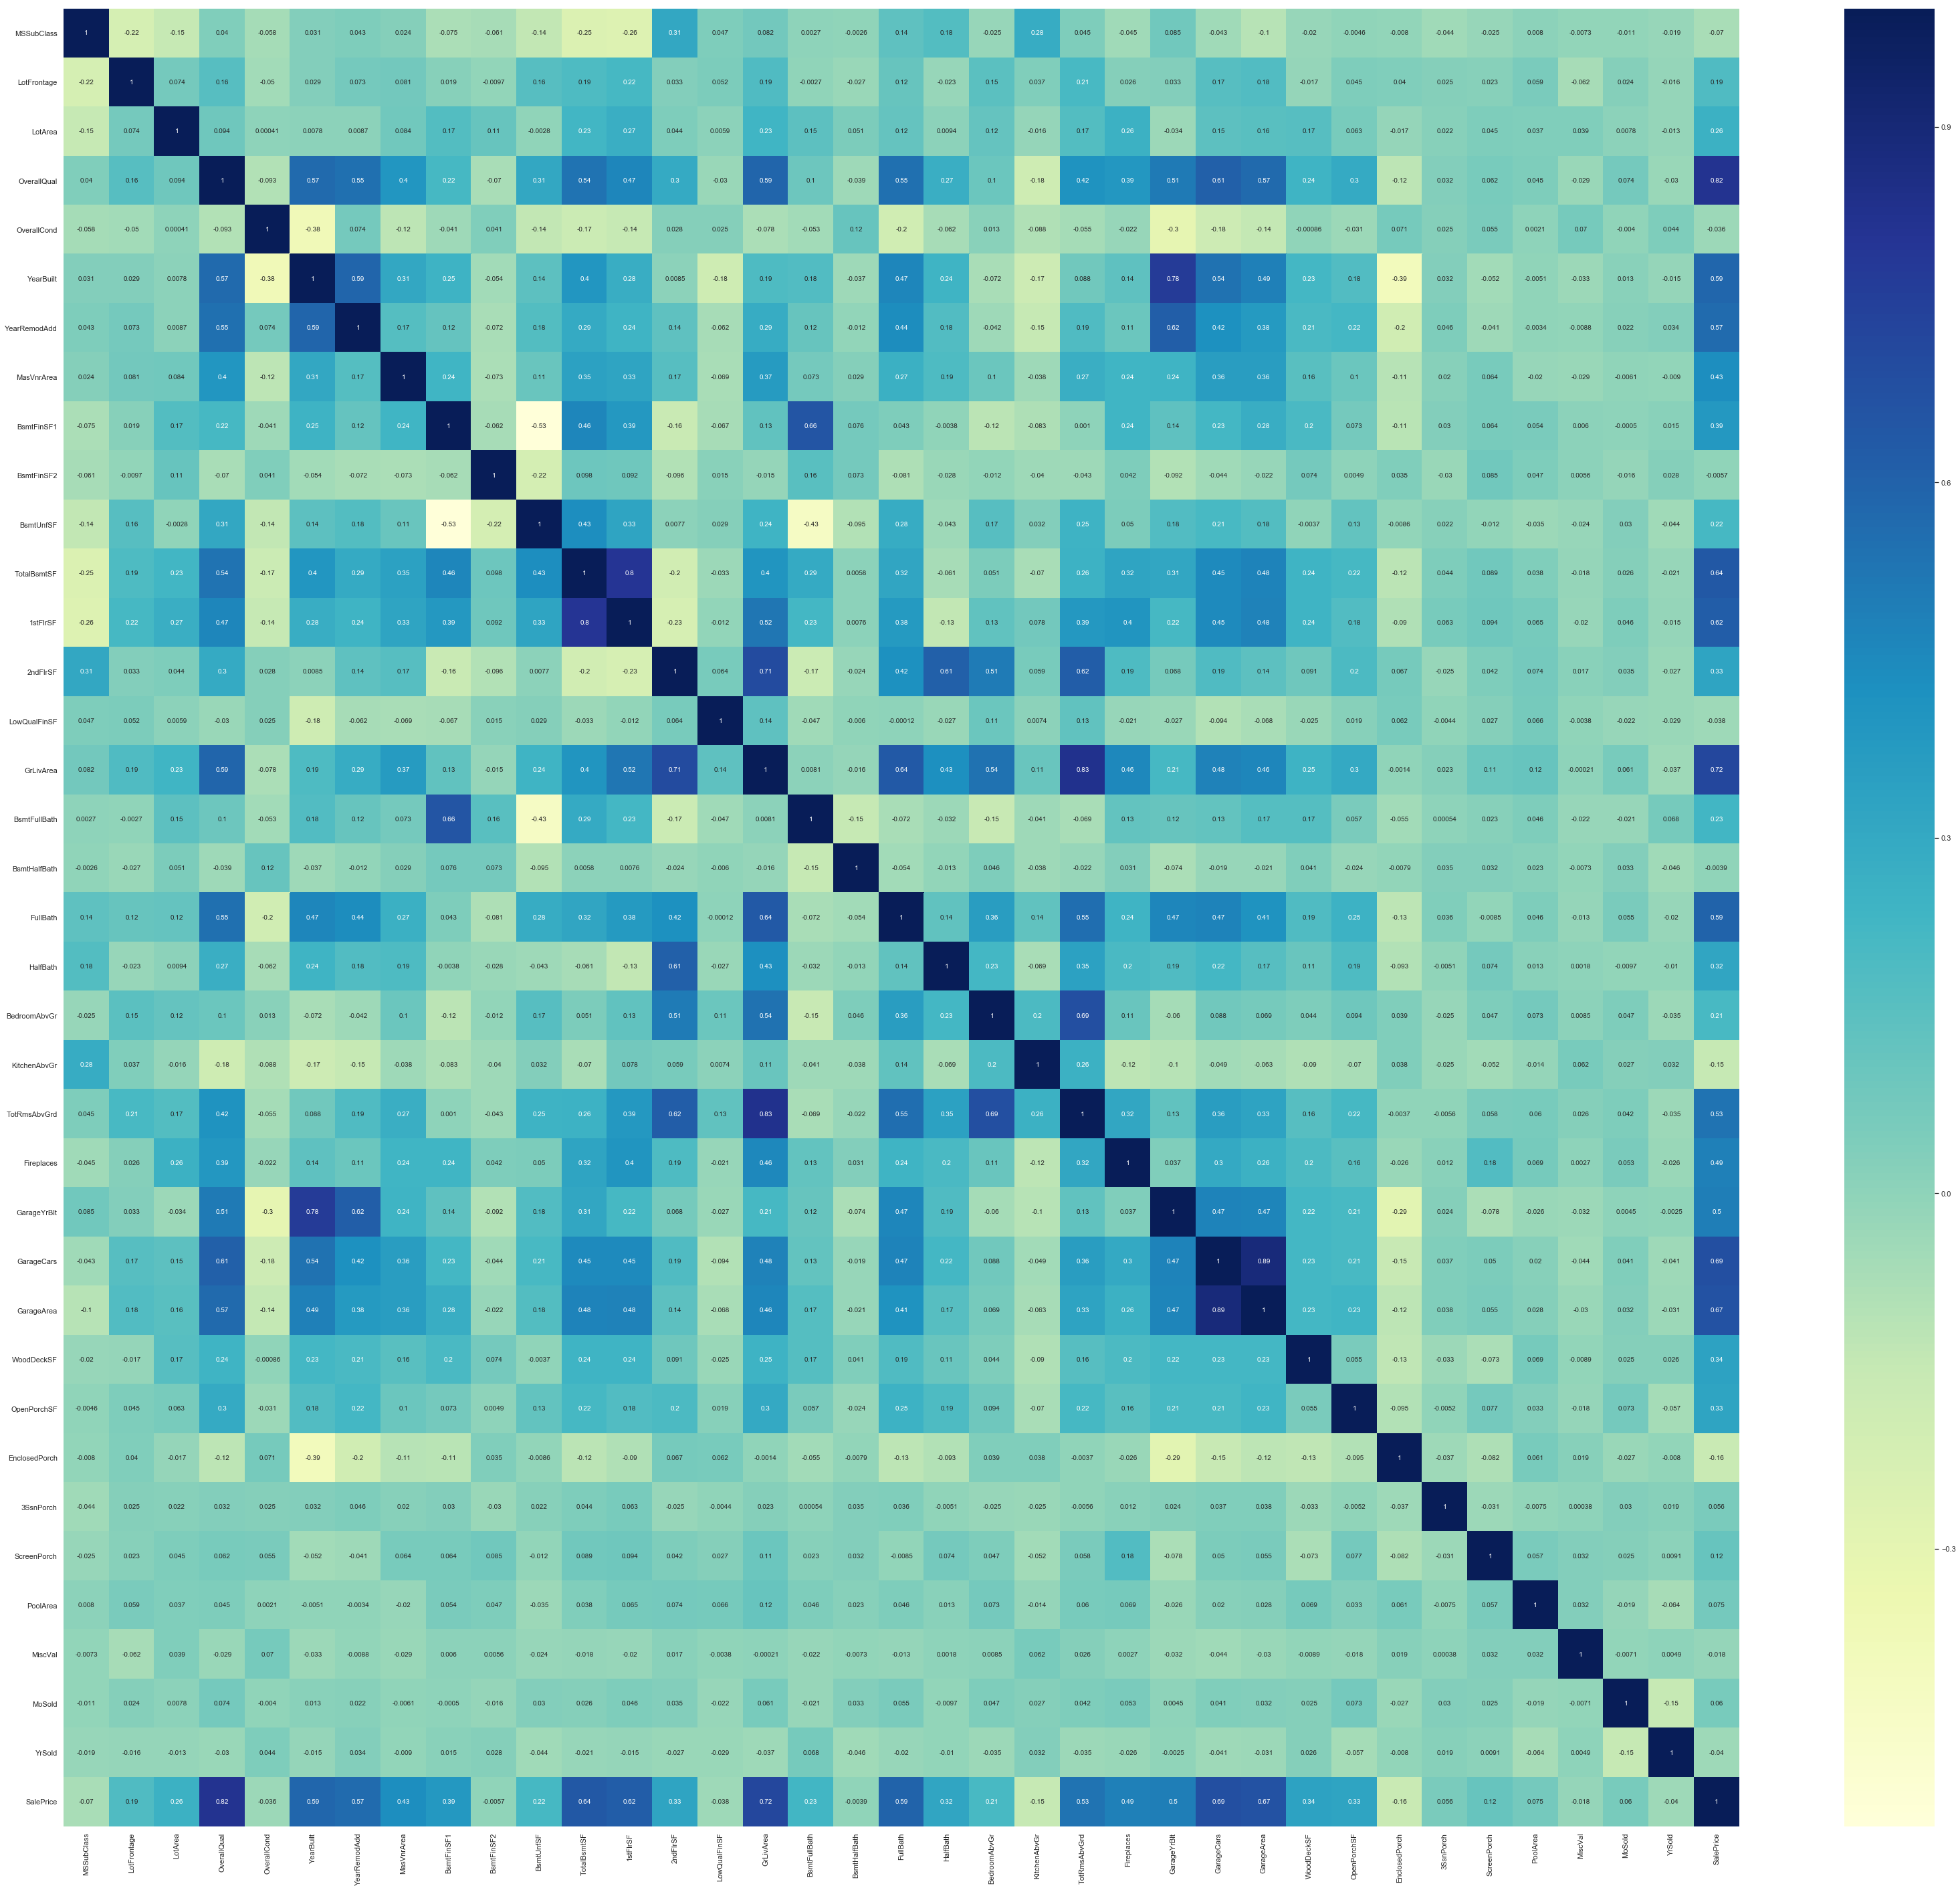

In [53]:
# Check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (50, 50))
sns.heatmap(houses.corr(), annot = True, cmap="YlGnBu")
plt.show()

## 4. Data Preparation

In [54]:
y = houses.loc[:, 'SalePrice']
X = houses.loc[:, houses.columns != 'SalePrice']

In [55]:
#Numerical to Categorical
X["MoSold"] = X["MoSold"].map(lambda x: "MS_" + str(x))
X['YrSold'] = X['YrSold'].map(lambda x: "YS_" + str(x))
X["YearBuilt"] = X["YearBuilt"].map(lambda x: "YB_" + str(x))
X['YearRemodAdd'] = X['YearRemodAdd'].map(lambda x: "YRA_" + str(x))
X["MSSubClass"] = X["MSSubClass"].map(lambda x: "MSSC" + str(x))

In [56]:
#ExPo to Ordinal
mapExPo = {"None":0, "Po":1, "Fa":2, "TA":3, "Gd":4, "Ex":5}
columns = ["ExterQual", "ExterCond", "BsmtQual", "BsmtCond", "HeatingQC", "KitchenQual", "FireplaceQu", "GarageCond", "GarageQual"]
for col in columns:
    X = X.replace({col:mapExPo})

In [57]:
X.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,MSSC60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,Inside,...,0,0,None,None,None,0,MS_2,YS_2008,WD,Normal
1,MSSC20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,FR2,...,0,0,None,None,None,0,MS_5,YS_2007,WD,Normal
2,MSSC60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,Inside,...,0,0,None,None,None,0,MS_9,YS_2008,WD,Normal
3,MSSC70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,Corner,...,0,0,None,None,None,0,MS_2,YS_2006,WD,Abnorml
4,MSSC60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,FR2,...,0,0,None,None,None,0,MS_12,YS_2008,WD,Normal


In [58]:
#Other Ordinals
X = X.replace({"BsmtExposure" : {"No":0, "None":0, "Mn":1, "Av":2, "Gd":3},
                "BsmtFinType1" : {"No":0, "None":0, "Unf":1, "LwQ":2, "Rec": 3, "BLQ":4, "ALQ":5, "GLQ":6},
                "BsmtFinType2" : {"No":0, "None":0, "Unf":1, "LwQ":2, "Rec": 3, "BLQ":4, "ALQ":5, "GLQ":6},
                "Functional" : {"Sal":1, "Sev":2, "Maj2":3, "Maj1":4, "Mod":5, "Min2":6, "Min1":7, "Typ":8}, 
                "LandSlope" : {"Sev":1, "Mod":2, "Gtl":3},
                "LotShape" : {"IR3":1, "IR2":2, "IR1":3, "Reg":4},
                "PavedDrive" : {"N":0, "P":1, "Y":2},
                "Street" : {"Grvl":1, "Pave":2}})

In [59]:
#Adding features
X['SumSF'] = X['TotalBsmtSF'] + X['1stFlrSF'] + X['2ndFlrSF']
X['TotalPoarchAr'] = X['OpenPorchSF'] + X['EnclosedPorch'] + X['3SsnPorch'] + X['ScreenPorch']
X['BsmtBath'] = X['BsmtFullBath'] + X['BsmtHalfBath']
X['BathAbvG'] = X['FullBath'] + X['HalfBath']
X.drop(['TotalBsmtSF','1stFlrSF','2ndFlrSF','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath'],axis = 1, inplace=True)
X.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SumSF,TotalPoarchAr,BsmtBath,BathAbvG
0,MSSC60,RL,65.0,8450,2,None,4,Lvl,AllPub,Inside,...,None,0,MS_2,YS_2008,WD,Normal,2566,61,1,3
1,MSSC20,RL,80.0,9600,2,None,4,Lvl,AllPub,FR2,...,None,0,MS_5,YS_2007,WD,Normal,2524,0,1,2
2,MSSC60,RL,68.0,11250,2,None,3,Lvl,AllPub,Inside,...,None,0,MS_9,YS_2008,WD,Normal,2706,42,1,3
3,MSSC70,RL,60.0,9550,2,None,3,Lvl,AllPub,Corner,...,None,0,MS_2,YS_2006,WD,Abnorml,2473,307,1,1
4,MSSC60,RL,84.0,14260,2,None,3,Lvl,AllPub,FR2,...,None,0,MS_12,YS_2008,WD,Normal,3343,84,1,3


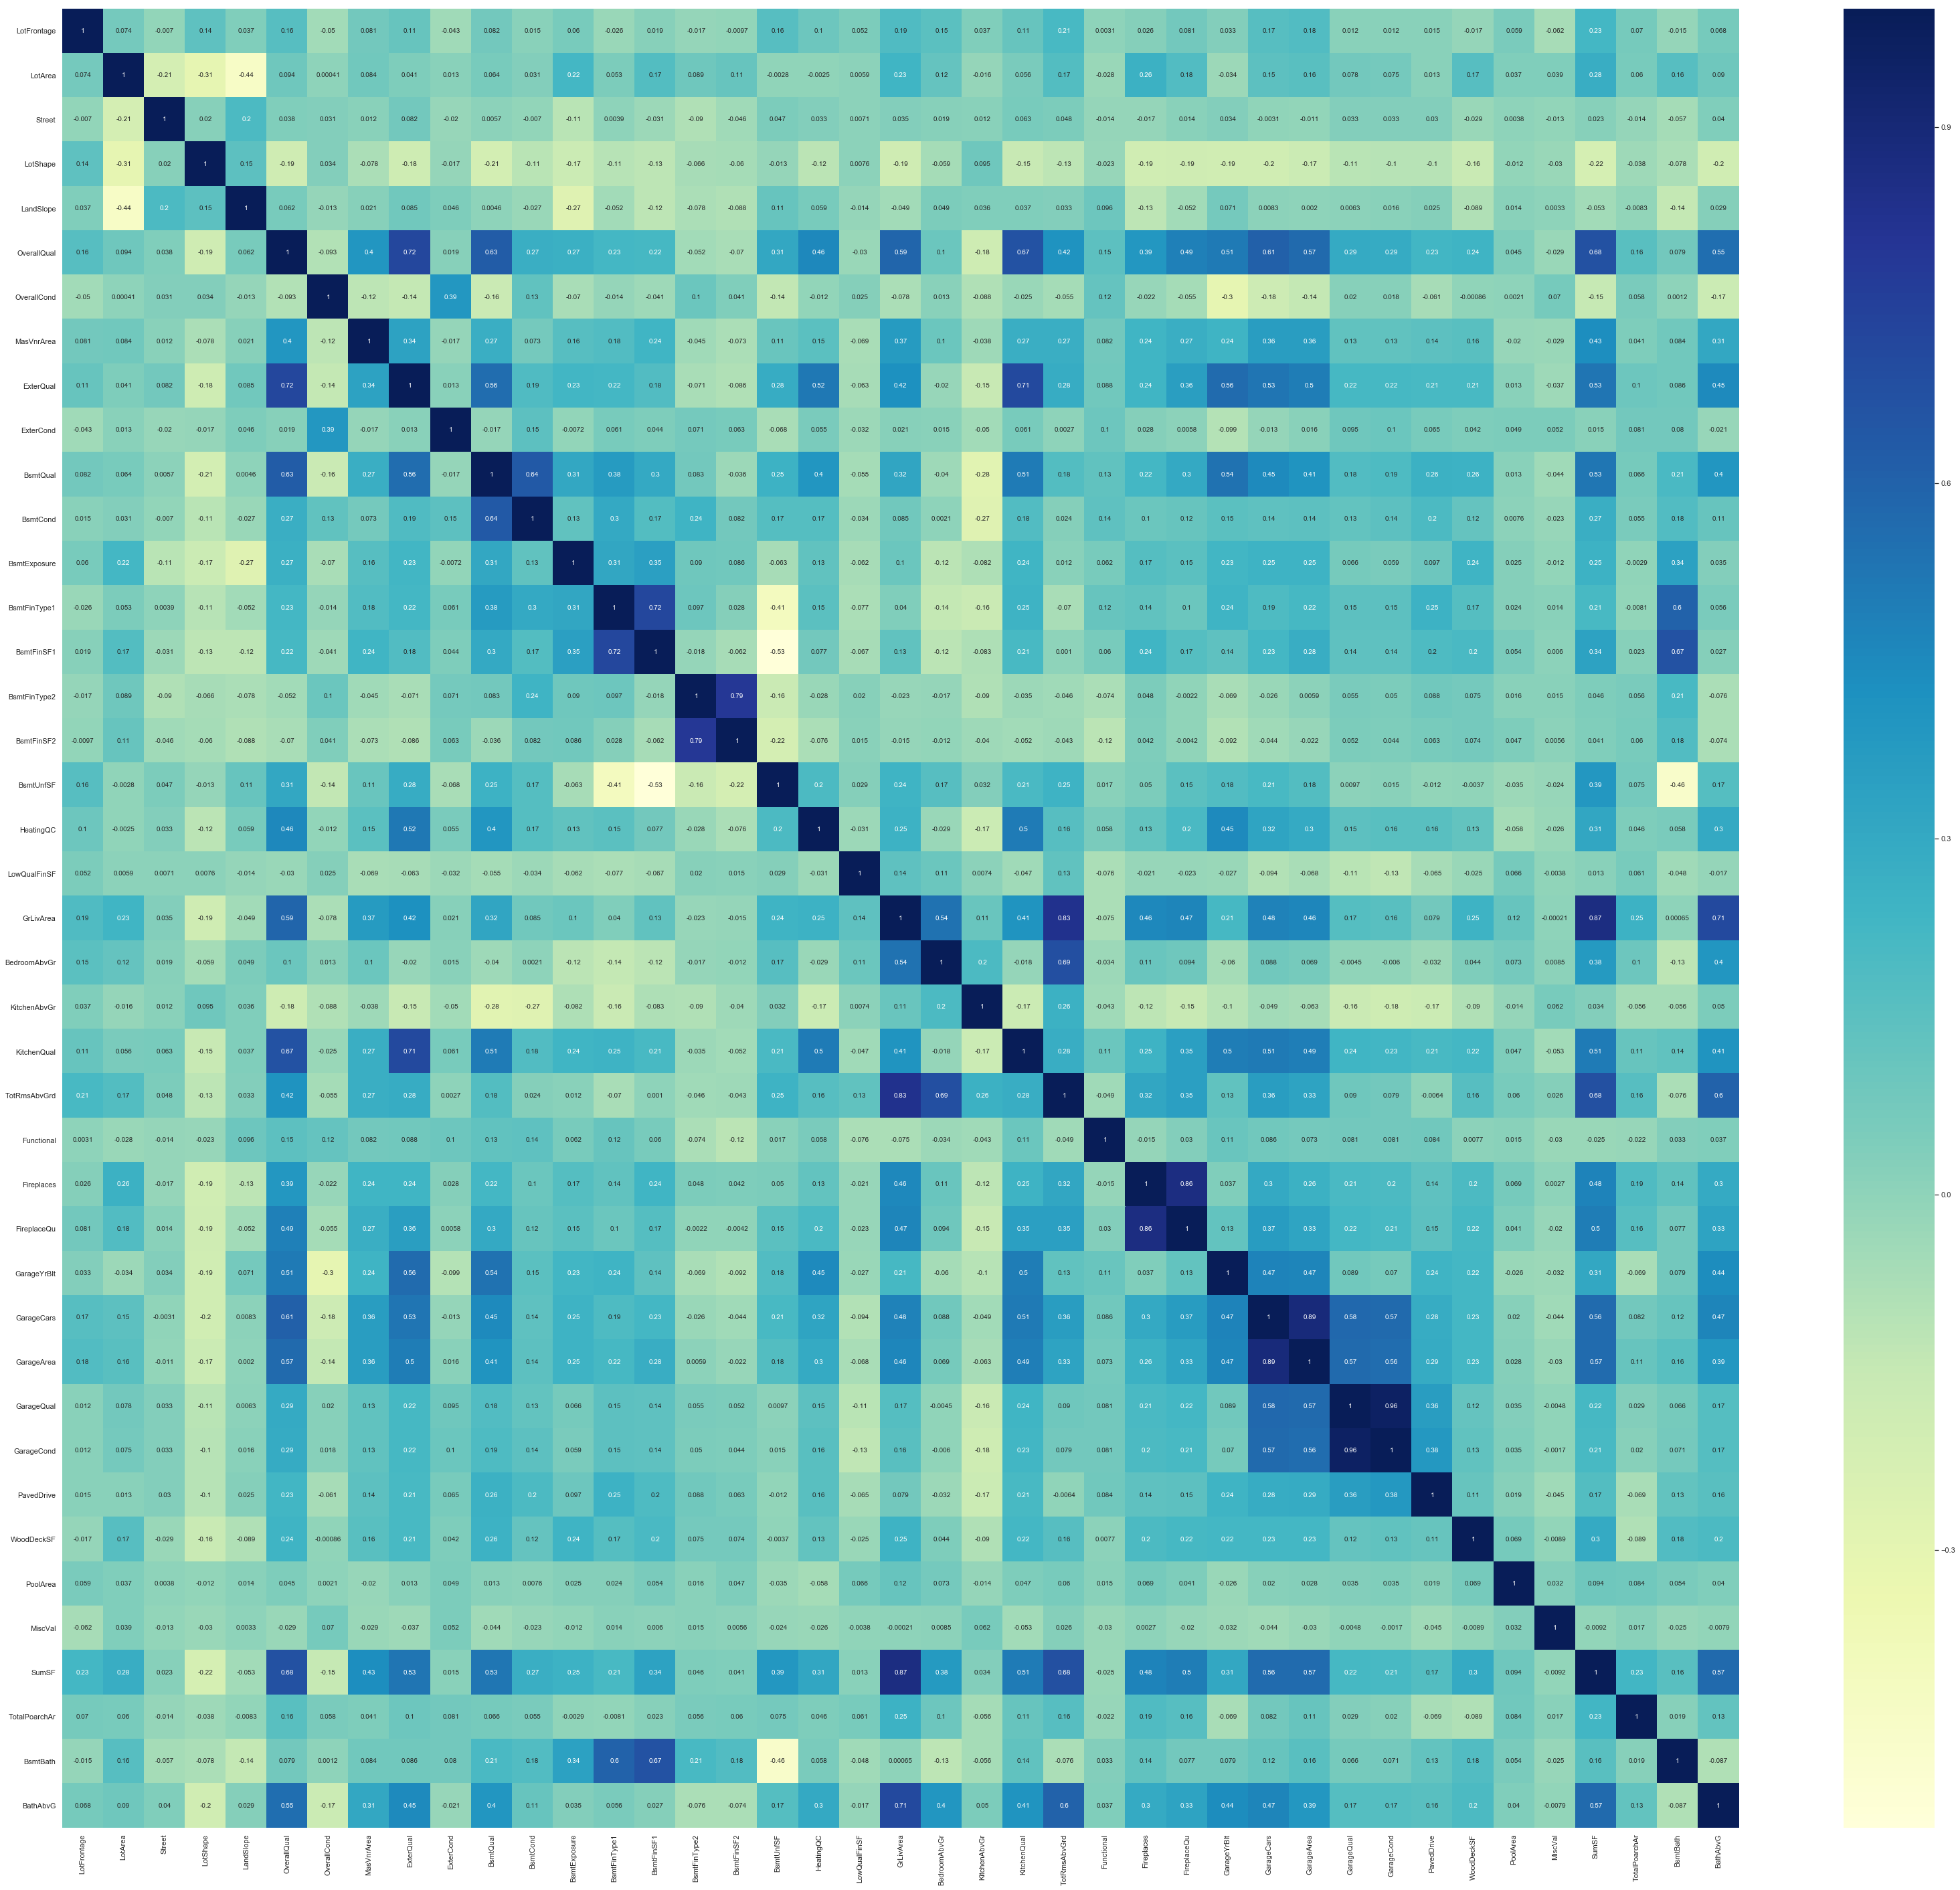

In [60]:
# Check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (50, 50))
sns.heatmap(X.corr(), annot = True, cmap="YlGnBu")
plt.show()

In [61]:
X = X.drop(['ExterQual','BsmtQual','KitchenQual','BsmtFinSF1','BsmtFinSF2','Fireplaces','GarageArea'],axis= 1)

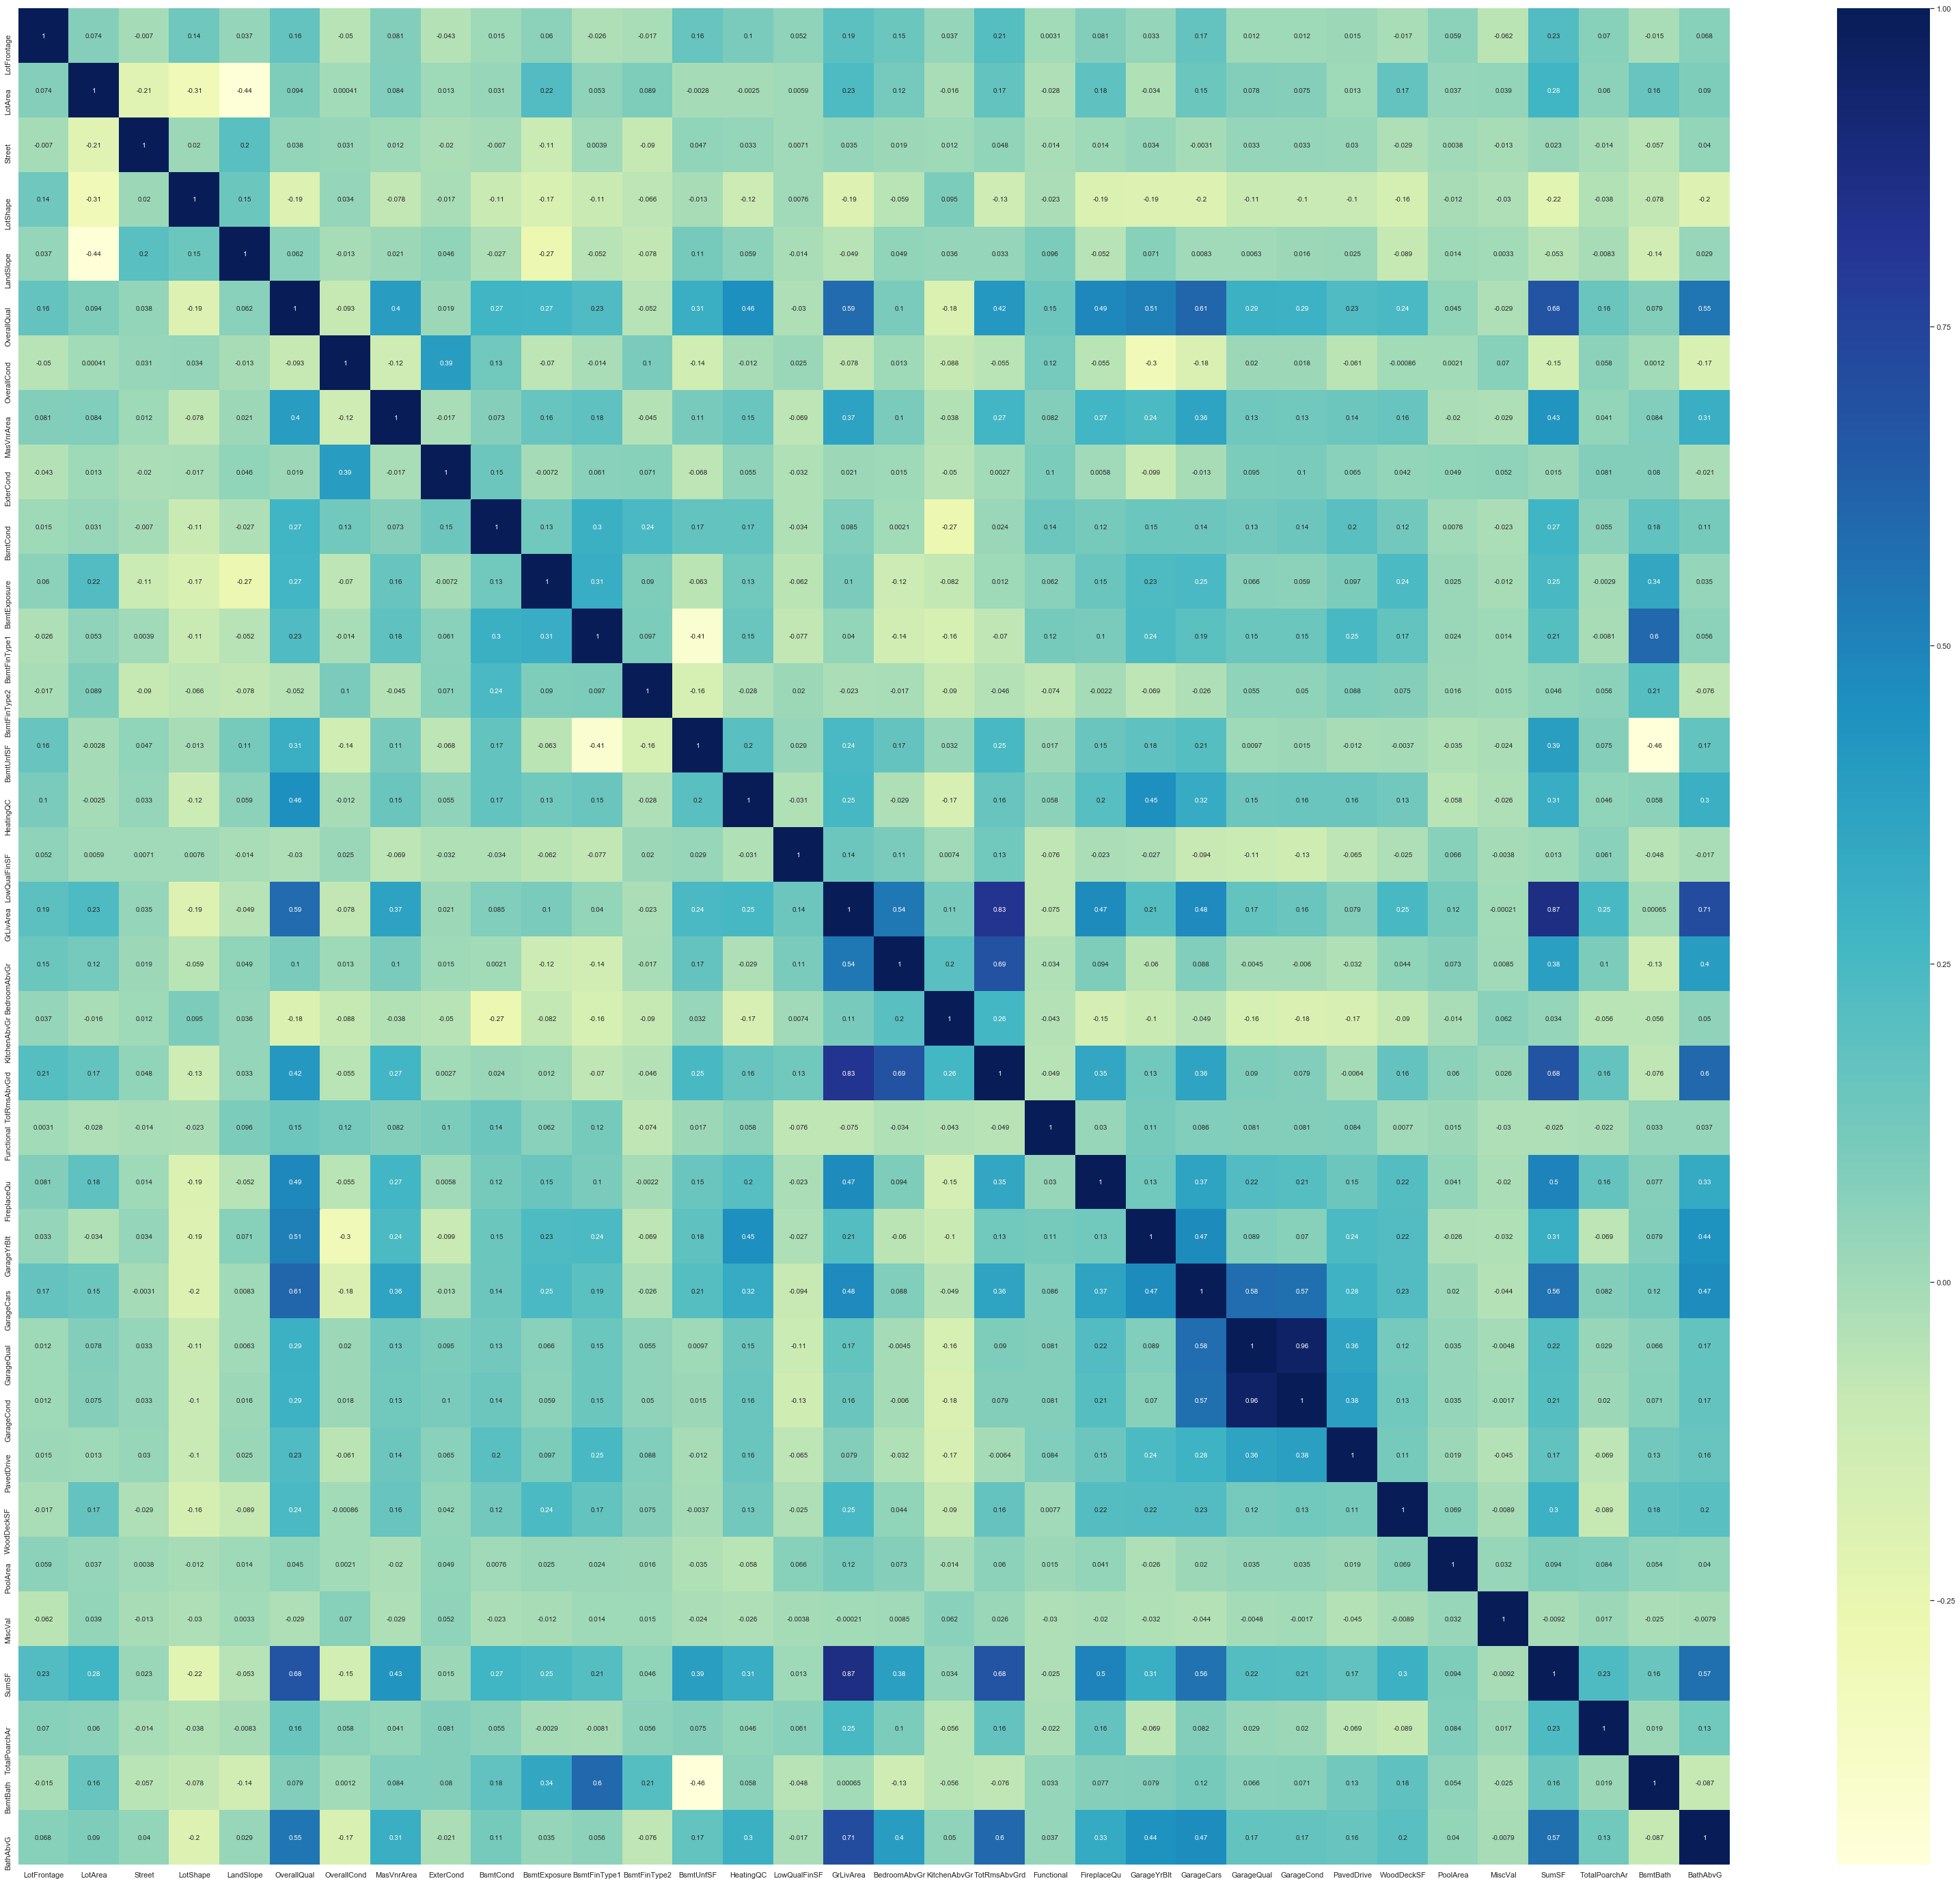

In [62]:
# Check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (50, 50))
sns.heatmap(X.corr(), annot = True, cmap="YlGnBu")
plt.show()

In [63]:
#Dividing cat and num
multivar = X.select_dtypes(include = ["object"]).columns
num_features = X.select_dtypes(exclude = ["object"]).columns
print("Number of categorical:", multivar.shape[0])
print("Number of numerical:", num_features.shape[0])

Number of categorical: 31
Number of numerical: 34


In [64]:
# creating dummy variables for categorical variables

multi_var_category=houses[multivar]
category_MulVar_Dummy = pd.get_dummies(multi_var_category)
category_MulVar_Dummy.head()

,MSSubClass,YearBuilt,YearRemodAdd,MoSold,YrSold,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,2003,2003,2,2008,0,0,0,1,0,...,0,0,0,1,0,0,0,0,1,0
1,20,1976,1976,5,2007,0,0,0,1,0,...,0,0,0,1,0,0,0,0,1,0
2,60,2001,2002,9,2008,0,0,0,1,0,...,0,0,0,1,0,0,0,0,1,0
3,70,1915,1970,2,2006,0,0,0,1,0,...,0,0,0,1,1,0,0,0,0,0
4,60,2000,2000,12,2008,0,0,0,1,0,...,0,0,0,1,0,0,0,0,1,0


In [65]:
# Let's drop the first column from categoryMulVarDummy using 'drop_first = True'

category_MulVar_Dummy = pd.get_dummies(multi_var_category, drop_first = True)

In [66]:
# Add the results to the original car dataframe
X = pd.concat([X, category_MulVar_Dummy], axis = 1)
X.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,MSSC60,RL,65.0,8450,2,None,4,Lvl,AllPub,Inside,...,0,0,0,0,1,0,0,0,1,0
1,MSSC20,RL,80.0,9600,2,None,4,Lvl,AllPub,FR2,...,0,0,0,0,1,0,0,0,1,0
2,MSSC60,RL,68.0,11250,2,None,3,Lvl,AllPub,Inside,...,0,0,0,0,1,0,0,0,1,0
3,MSSC70,RL,60.0,9550,2,None,3,Lvl,AllPub,Corner,...,0,0,0,0,1,0,0,0,0,0
4,MSSC60,RL,84.0,14260,2,None,3,Lvl,AllPub,FR2,...,0,0,0,0,1,0,0,0,1,0


In [67]:
# Drop newMulVarCategory as we have created the dummies for it
X.drop(multi_var_category,axis = 1, inplace=True)
X.head()

,LotFrontage,LotArea,Street,LotShape,LandSlope,OverallQual,OverallCond,MasVnrArea,ExterCond,BsmtCond,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,65.0,8450,2,4,3,7,5,196.0,3,3,...,0,0,0,0,1,0,0,0,1,0
1,80.0,9600,2,4,3,6,8,0.0,3,3,...,0,0,0,0,1,0,0,0,1,0
2,68.0,11250,2,3,3,7,5,162.0,3,3,...,0,0,0,0,1,0,0,0,1,0
3,60.0,9550,2,3,3,7,5,0.0,3,4,...,0,0,0,0,1,0,0,0,0,0
4,84.0,14260,2,3,3,8,5,350.0,3,3,...,0,0,0,0,1,0,0,0,1,0


In [68]:
X.dtypes

LotFrontage              float64
LotArea                    int64
Street                     int64
LotShape                   int64
LandSlope                  int64
OverallQual                int64
OverallCond                int64
MasVnrArea               float64
ExterCond                  int64
BsmtCond                   int64
BsmtExposure               int64
BsmtFinType1               int64
BsmtFinType2               int64
BsmtUnfSF                  int64
HeatingQC                  int64
LowQualFinSF               int64
GrLivArea                  int64
BedroomAbvGr               int64
KitchenAbvGr               int64
TotRmsAbvGrd               int64
Functional                 int64
FireplaceQu                int64
GarageYrBlt              float64
GarageCars                 int64
GarageQual                 int64
GarageCond                 int64
PavedDrive                 int64
WoodDeckSF                 int64
PoolArea                   int64
MiscVal                    int64
          

## Splitting the Data into Training and Testing Sets
As you know, the first basic step for regression is performing a train-test split.

In [69]:
from sklearn.preprocessing import StandardScaler
# scale
scaler = StandardScaler()
scaler.fit(X)

# split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.2, 
                                                    random_state = 1)

In [70]:
from sklearn import metrics
# linear regression
lm = LinearRegression()
lm.fit(X_train, y_train)

# predict
y_train_pred = lm.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
print('RMSE :', np.sqrt(metrics.mean_squared_error(y_train, y_train_pred)))
print(metrics.mean_absolute_error(y_true=y_train, y_pred=y_train_pred))
y_test_pred = lm.predict(X_test)
print('R2 :', metrics.r2_score(y_true=y_test, y_pred=y_test_pred))
print('RMSE :', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))
print('MAE:', metrics.mean_absolute_error(y_true=y_test, y_pred=y_test_pred))

0.9435148171000052
RMSE : 0.09225425406398212
0.06665367594885616
R2 : 0.9057748197588394
RMSE : 0.13235558267958256
MAE: 0.09041766320675916


In [71]:
model_parameters = list(lm.coef_)
model_parameters.insert(0, lm.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_parameters))

[('constant', 7.232),
 ('LotFrontage', 0.0),
 ('LotArea', 0.0),
 ('Street', 0.125),
 ('LotShape', -0.009),
 ('LandSlope', 0.009),
 ('OverallQual', 0.05),
 ('OverallCond', 0.037),
 ('MasVnrArea', 0.0),
 ('ExterCond', -0.005),
 ('BsmtCond', 0.003),
 ('BsmtExposure', 0.012),
 ('BsmtFinType1', 0.003),
 ('BsmtFinType2', -0.005),
 ('BsmtUnfSF', -0.0),
 ('HeatingQC', 0.016),
 ('LowQualFinSF', 0.0),
 ('GrLivArea', 0.0),
 ('BedroomAbvGr', 0.003),
 ('KitchenAbvGr', -0.088),
 ('TotRmsAbvGrd', 0.001),
 ('Functional', 0.033),
 ('FireplaceQu', 0.01),
 ('GarageYrBlt', 0.001),
 ('GarageCars', 0.046),
 ('GarageQual', 0.028),
 ('GarageCond', -0.018),
 ('PavedDrive', 0.02),
 ('WoodDeckSF', 0.0),
 ('PoolArea', 0.001),
 ('MiscVal', -0.0),
 ('SumSF', 0.0),
 ('TotalPoarchAr', 0.0),
 ('BsmtBath', 0.03),
 ('BathAbvG', 0.026),
 ('MSZoning_FV', 0.547),
 ('MSZoning_RH', 0.5),
 ('MSZoning_RL', 0.51),
 ('MSZoning_RM', 0.446),
 ('Alley_None', -0.009),
 ('Alley_Pave', 0.007),
 ('LandContour_HLS', 0.04),
 ('LandContou

### LASSO REGRESSION

In [72]:
# number of features in X_train
len(X_train.columns)

189

In [101]:
# grid search CV

# set up cross validation scheme
folds = KFold(n_splits = 5, shuffle = True, random_state = 100)

# specify range of hyperparameters
params = params = {'alpha': [0.001, 0.01, 1.0, 5.0, 10.0]}

# grid search
# lasso model
model = Lasso()
model.fit(X_train, y_train)
model_cv = GridSearchCV(estimator = model, param_grid = params, 
                        scoring= 'r2', 
                        cv = folds, 
                        return_train_score=True, verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    0.6s finished


GridSearchCV(cv=KFold(n_splits=5, random_state=100, shuffle=True),
       error_score='raise',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': [0.001, 0.01, 1.0, 5.0, 10.0]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='r2', verbose=1)

In [102]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.071412,0.007891,0.000399,0.000489,0.001,{'alpha': 0.001},0.914563,0.907847,0.904853,0.912184,...,0.912866,0.006887,1,0.927019,0.926697,0.929106,0.928062,0.925469,0.927271,0.001236
1,0.024133,0.001936,0.000799,0.000399,0.01,{'alpha': 0.01},0.888394,0.874367,0.871488,0.882299,...,0.882088,0.008380,2,0.891171,0.889838,0.893465,0.892967,0.889218,0.891332,0.001670
2,0.010370,0.000799,0.000202,0.000403,1,{'alpha': 1.0},0.782672,0.765875,0.720351,0.743386,...,0.748691,0.022752,3,0.751998,0.754723,0.769965,0.762355,0.763306,0.760469,0.006427
3,0.007779,0.000399,0.000399,0.000489,5,{'alpha': 5.0},0.715729,0.699033,0.645286,0.650093,...,0.681003,0.028123,4,0.680176,0.684403,0.699192,0.696928,0.687865,0.689713,0.007273
4,0.007180,0.000399,0.000601,0.000490,10,{'alpha': 10.0},0.703978,0.700284,0.635821,0.642000,...,0.675508,0.030067,5,0.671731,0.678210,0.691781,0.689355,0.678676,0.681951,0.007492


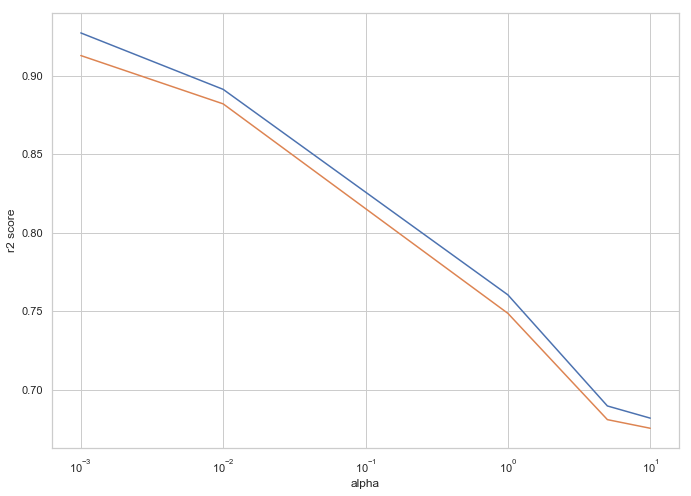

In [103]:
# plot
plt.figure(figsize=(10, 8))
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('r2 score')
plt.xscale('log')
plt.show()

### Model with optimal alpha =0.001 because of Simple model

In [104]:
# model with optimal alpha
# lasso regression
lm = Lasso(alpha=0.001)
lm.fit(X_train, y_train)

# predict
y_train_pred = lm.predict(X_train)
print('R2 :', metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
print('RMSE :', np.sqrt(metrics.mean_squared_error(y_train, y_train_pred)))
print('MAE:', metrics.mean_absolute_error(y_true=y_train, y_pred=y_train_pred))
y_test_pred = lm.predict(X_test)
print('R2 :', metrics.r2_score(y_true=y_test, y_pred=y_test_pred))
print('RMSE :', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))
print('MAE:', metrics.mean_absolute_error(y_true=y_test, y_pred=y_test_pred))

R2 : 0.9254398387283281
RMSE : 0.10599186924647575
MAE: 0.07641917711328494
R2 : 0.9088200815674359
RMSE : 0.130199217927495
MAE: 0.09075171067865673


In [105]:
# lasso model parameters
model_parameters = list(lm.coef_)
model_parameters.insert(0, lm.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_parameters))

[('constant', 8.09),
 ('LotFrontage', 0.0),
 ('LotArea', 0.0),
 ('Street', 0.0),
 ('LotShape', -0.014),
 ('LandSlope', 0.0),
 ('OverallQual', 0.066),
 ('OverallCond', 0.039),
 ('MasVnrArea', 0.0),
 ('ExterCond', -0.0),
 ('BsmtCond', -0.003),
 ('BsmtExposure', 0.016),
 ('BsmtFinType1', 0.003),
 ('BsmtFinType2', -0.005),
 ('BsmtUnfSF', -0.0),
 ('HeatingQC', 0.019),
 ('LowQualFinSF', -0.0),
 ('GrLivArea', 0.0),
 ('BedroomAbvGr', 0.0),
 ('KitchenAbvGr', -0.027),
 ('TotRmsAbvGrd', -0.0),
 ('Functional', 0.03),
 ('FireplaceQu', 0.011),
 ('GarageYrBlt', 0.001),
 ('GarageCars', 0.046),
 ('GarageQual', 0.012),
 ('GarageCond', 0.01),
 ('PavedDrive', 0.015),
 ('WoodDeckSF', 0.0),
 ('PoolArea', 0.0),
 ('MiscVal', -0.0),
 ('SumSF', 0.0),
 ('TotalPoarchAr', 0.0),
 ('BsmtBath', 0.017),
 ('BathAbvG', 0.018),
 ('MSZoning_FV', 0.071),
 ('MSZoning_RH', 0.0),
 ('MSZoning_RL', 0.074),
 ('MSZoning_RM', -0.012),
 ('Alley_None', 0.0),
 ('Alley_Pave', -0.0),
 ('LandContour_HLS', 0.0),
 ('LandContour_Low', 0.0)

### RIDGE REGRESSION 

In [106]:
# number of features
len(X_train.columns)

189

In [107]:
from sklearn.feature_selection import RFE
# grid search CV

# set up cross validation scheme
folds = KFold(n_splits = 5, shuffle = True, random_state = 100)

# specify range of hyperparameters
params = [{'n_features_to_select': list(range(1, 30))}]

# grid search
# Ridge model
lm = Ridge()
lm.fit(X_train, y_train)

rfe = RFE(lm)  
rfe = rfe.fit(X_train, y_train)
model_cv = GridSearchCV(estimator = rfe, param_grid = params, 
                        scoring= 'r2', 
                        cv = folds, 
                        return_train_score=True, verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 29 candidates, totalling 145 fits


[Parallel(n_jobs=1)]: Done 145 out of 145 | elapsed:   50.3s finished


GridSearchCV(cv=KFold(n_splits=5, random_state=100, shuffle=True),
       error_score='raise',
       estimator=RFE(estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
  n_features_to_select=None, step=1, verbose=0),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'n_features_to_select': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='r2', verbose=1)

In [108]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_features_to_select,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.366220,0.019353,0.000598,0.000489,1,{'n_features_to_select': 1},0.019097,-0.014959,-0.003470,0.036892,...,0.020319,0.028276,29,0.016325,0.020940,0.009933,0.091476,0.086042,0.044943,0.035987
1,0.355648,0.010808,0.000598,0.000488,2,{'n_features_to_select': 2},0.084280,-0.019502,-0.003589,0.056337,...,0.036025,0.040249,28,0.103026,0.029280,0.014478,0.106348,0.105937,0.071814,0.041055
2,0.424065,0.052108,0.000598,0.000489,3,{'n_features_to_select': 3},0.084239,0.652981,0.021066,0.056472,...,0.175427,0.239638,27,0.107479,0.691997,0.032139,0.110456,0.110320,0.210478,0.242615
3,0.352856,0.002475,0.000598,0.000489,4,{'n_features_to_select': 4},0.069355,0.670337,0.022640,0.645850,...,0.418394,0.304662,26,0.114835,0.700953,0.038928,0.696532,0.689655,0.448181,0.304134
4,0.354851,0.005997,0.000599,0.000489,5,{'n_features_to_select': 5},0.076563,0.670059,0.684601,0.682513,...,0.559497,0.241525,25,0.121058,0.701906,0.687401,0.735403,0.691103,0.587374,0.233772


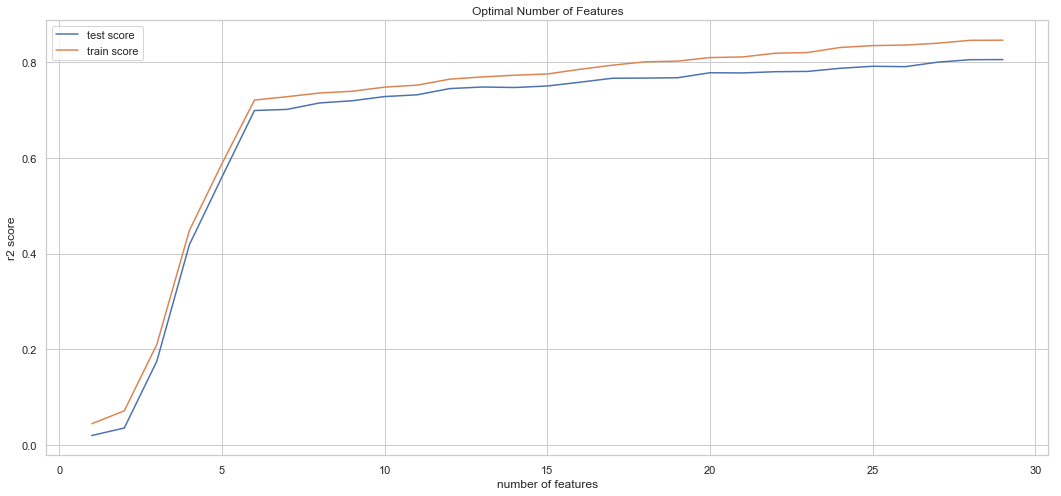

In [109]:
# plot
# plotting cv results
plt.figure(figsize=(16,8))

plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_test_score"])
plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_train_score"])
plt.xlabel('number of features')
plt.ylabel('r2 score')
plt.title("Optimal Number of Features")
plt.legend(['test score', 'train score'], loc='upper left')

### Model with optimal alpha =10 because of Simple model

In [98]:
# model with optimal alpha
# Ridge regression
lm = Ridge(alpha=26)
lm.fit(X_train, y_train)

# predict
y_train_pred = lm.predict(X_train)
print('R2 :', metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
print('RMSE :', np.sqrt(metrics.mean_squared_error(y_train, y_train_pred)))
print('MAE:', metrics.mean_absolute_error(y_true=y_train, y_pred=y_train_pred))
y_test_pred = lm.predict(X_test)
print('R2 :', metrics.r2_score(y_true=y_test, y_pred=y_test_pred))
print('RMSE :', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))
print('MAE:', metrics.mean_absolute_error(y_true=y_test, y_pred=y_test_pred))

R2 : 0.930113470507
RMSE : 0.10261618604813168
MAE: 0.07365134292790512
R2 : 0.9083707367988647
RMSE : 0.1305196417474815
MAE: 0.09040517985257934


Comparing each of the cross-validation scores allows me to identify the best model for predicting house prices. The ridge regression produces the highest score which implies that shrinking the coefficients for select features improves the overall explanatory power of the model. However, because the scores are so similar, using lasso eliminates coefficients and allows for a more interpretable model, therefore I will make predictions using lasso. 

##### LASSO REGRESSION
- R-sqaured score for Train set= 0.9254398387283281
- R-sqaured score for Test set=  0.9088200815674359

##### RIDGE REGRESSION
- R-sqaured score for Train set= 0.930113470507
- R-sqaured score for Test set=  0.9083707367988647

The R-squared score for my testing set is nearly identical to the score for my training set. This means my model is neither overfit nor underfit. 

In conclusion, performing a lasso regression on my X dataset is my best model. It produces the best balance between high explanatory power of sales price and most accessible interpretation.

### Insights

#### Positive predictors:
##### Type of sale
- 'SaleType_New'(Home just constructed and sold)= 0.105

##### Identifies the general zoning classification of the sale.
- 'MSZoning_RL' (Residential Low Density) = 0.074
- 'MSZoning_FV' (Floating Village Residential) = 0.071

##### Physical locations within Ames city limits
- 'Neighborhood_Crawfor' (Crawford) = 0.068
- 'Neighborhood_NridgHt' (Northridge Heights) = 0.029
- 'Neighborhood_StoneBr' (Stone Brook) = 0.025
- 'Neighborhood_BrkSide' (Brookside) = 0.022
- 'Neighborhood_Somerst' (Somerset) = 0.03

##### Floating Village Residential
- 'OverallQual'= 0.066

##### Central air conditioning
- 'CentralAir_Y' (Yes) = 0.059 

##### Proximity to various conditions
- 'Condition1_Norm' (Normal) = 0.049

##### Type of foundation 
- 'Foundation_PConc' (Poured Contrete	) = 0.048
- 'Foundation_CBlock'(Cinder Block) = 0.004

##### Size of garage in car capacity
- 'GarageCars' = 0.046

##### Rates the overall condition of the house
- 'OverallCond'= 0.039

##### Condition of sale
- 'SaleCondition_Normal'= 0.039    
           
##### Lot configuration
- 'LotConfig_CulDSac' (Cul-de-sac) = 0.029

##### Refers to walkout or garden level walls
- 'BsmtExposure'= 0.016

##### Rating of basement finished area
- 'BsmtFinType1' = 0.003

##### Heating quality and condition
- 'HeatingQC' = 0.019

##### Masonry veneer type
- 'MasVnrType_Stone' (Stone) = 0.015

##### Exterior covering on house
- 'Exterior1st_BrkFace' (Brick Face) = 0.011
- 'Exterior1st_MetalSd'(Metal Siding) = 0.007
- 'Exterior1st_VinylSd' (Vinyl Siding) = 0.01

##### Style of dwelling
- 'HouseStyle_1Story'(One story) = 0.017
- 'HouseStyle_SLvl'(Split Level) = 0.003

##### Home functionality (Assume typical unless deductions are warranted)
- 'Functional'= 0.03
 
##### Fireplace quality
- 'FireplaceQu' = 0.011

##### Year garage was built
- 'GarageYrBlt'= 0.001 
 
##### Garage quality
- 'GarageQual' = 0.012
 
##### Garage condition
- 'GarageCond' = 0.01
 
##### Paved driveway
- 'PavedDrive' = 0.015
 
##### Basement bathrooms 
- 'BsmtBath' = 0.017
 
##### Baths above grade
- 'BathAbvG'= 0.018
 
##### Garage location
- 'GarageType_Attchd' (Attached to home) = 0.003
 
##### Fence quality
- 'Fence_None' (No Fence) 0.007


#### Negative predictors

##### Grade of kitchen
- 'KitchenAbvGr'= -0.027

##### Exterior covering on house
- 'Exterior1st_Wd Sdng' (Wood Siding) = -0.012
- 'Exterior1st_Plywood' (Plywood) = -0.004
            
##### Identifies the general zoning classification of the sale.
- 'MSZoning_RM' (Residential Medium Density) = -0.012

##### General shape of property
- 'LotShape' = -0.014

##### Evaluates the general condition of the basement
- 'BsmtCond' = -0.003

##### Rating of basement finished area (if multiple types)
- 'BsmtFinType2' = -0.005

##### Flatness of the property
- 'LandContour_Lvl'(Near Flat/Level	) = -0.002
 
##### Physical locations within Ames city limits
- 'Neighborhood_Edwards'(Edwards) = -0.007
- 'Neighborhood_OldTown'(Old Town) = -0.005

##### Type of dwelling
- 'BldgType_TwnhsI' (Townhouse Inside Unit) = -0.013
- 'BldgType_TwnhsE' (Townhouse End Unit)= -0.001

#####  Interior finish of the garage
- 'GarageFinish_Unf'(Unfinished) = -0.006

##### Electrical system
- 'Electrical_SBrkr'(Standard Circuit Breakers & Romex) = -0.005